#1 Most awarded gender: Male
#1 Most awarded birth country: United States of America
____________________


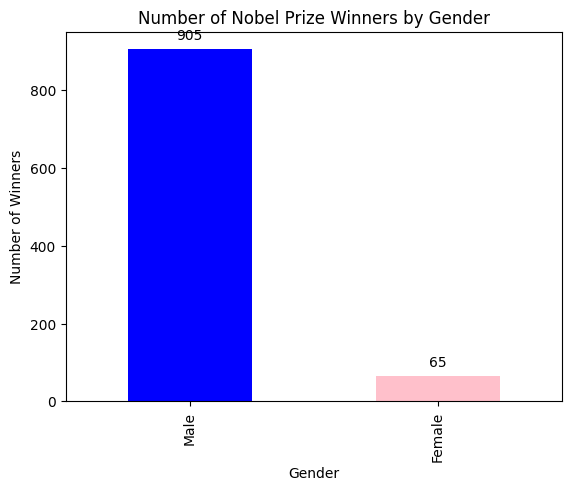


#2 The decade with the highest rate of US-born winners is 2000.
____________________

#3 The decade and category pair with the highest proportion of female award winners is:
decade
1900    (1900, Literature)
1910     (1910, Chemistry)
1920    (1920, Literature)
1930         (1930, Peace)
1940         (1940, Peace)
1950     (1950, Chemistry)
1960    (1960, Literature)
1970         (1970, Peace)
1980      (1980, Medicine)
1990    (1990, Literature)
2000    (2000, Literature)
2010         (2010, Peace)
2020    (2020, Literature)
Name: female_proportion, dtype: object
____________________

#4 The first woman to receive a Nobel Prize is: Marie Curie, nÃ©e Sklodowska
#4 She received the award in the category: Physics
____________________

#5 Individuals or organizations that have won more than one Nobel Prize:
* Marie Curie, nÃ©e Sklodowska
* ComitÃ© international de la Croix Rouge (International Committee of the Red Cross)
* Linus Carl Pauling
* Office of the United Nations High Commission

<ipython-input-5-f1e5223fe6bf>:98: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


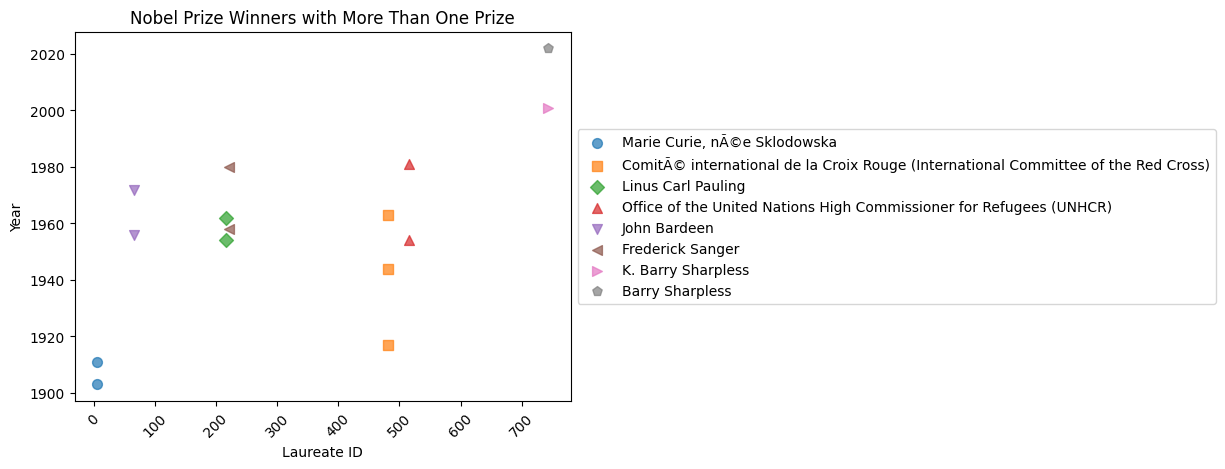

In [5]:
"""
Nobel Prize Winners Data Analysis Script
Author: [Your Name]
Date: [Current Date]
"""

import pandas as pd
import matplotlib.pyplot as plt

def most_awarded_gender_and_country(nobel_data):
    # Section 1: Most Awarded Gender and Birth Country
    top_gender = nobel_data['sex'].value_counts().idxmax()
    top_country = nobel_data['birth_country'].value_counts().idxmax()

    print("#1 Most awarded gender:", top_gender)
    print("#1 Most awarded birth country:", top_country)
    print("____________________")

    # Visualize the number of Nobel Prize winners by gender
    gender_counts = nobel_data['sex'].value_counts()
    ax = gender_counts.plot(kind='bar', color=['blue', 'pink'])

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title('Number of Nobel Prize Winners by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Winners')
    plt.show()

def highest_rate_us_born_winners(nobel_data):
    # Section 2: Decade with the Highest Rate of US-born Winners
    nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')
    nobel_data['decade'] = (nobel_data['year'].dt.year // 10) * 10

    decade_counts = nobel_data.groupby(['decade', 'birth_country']).size().unstack().fillna(0)
    decade_counts['us_rate'] = decade_counts['United States of America'] / decade_counts.sum(axis=1)

    max_decade_usa = decade_counts['us_rate'].idxmax()

    print(f"\n#2 The decade with the highest rate of US-born winners is {max_decade_usa}.")
    print("____________________")

def highest_proportion_female_winners(nobel_data):
    # Section 3: Decade and Category Pair with Highest Proportion of Female Winners
    nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')
    nobel_data['decade'] = (nobel_data['year'].dt.year // 10) * 10

    decade_category_counts = nobel_data.groupby(['decade', 'category', 'sex']).size().unstack(fill_value=0)
    decade_category_counts['female_proportion'] = (decade_category_counts['Female'] / decade_category_counts.sum(axis=1)).fillna(0)

    max_female_decade_category = decade_category_counts.groupby('decade')['female_proportion'].idxmax()

    print("\n#3 The decade and category pair with the highest proportion of female award winners is:")
    print(max_female_decade_category)
    print("____________________")

def first_woman_to_receive_nobel_prize(nobel_data):
    # Section 4: First Woman to Receive a Nobel Prize
    first_woman = nobel_data[nobel_data['sex'] == 'Female'].sort_values('year').iloc[0]
    first_woman_name = first_woman['full_name']
    first_woman_category = first_woman['category']

    print("\n#4 The first woman to receive a Nobel Prize is:", first_woman_name)
    print("#4 She received the award in the category:", first_woman_category)
    print("____________________")

def individuals_or_organizations_with_multiple_prizes(nobel_data):
    # Section 5: Individuals or Organizations with More Than One Nobel Prize
    prizes_per_laureate = nobel_data.groupby('laureate_id').size()
    repeat_laureates = prizes_per_laureate[prizes_per_laureate > 1].index
    repeat_list = nobel_data[nobel_data['laureate_id'].isin(repeat_laureates)]['full_name'].unique().tolist()

    print("\n#5 Individuals or organizations that have won more than one Nobel Prize:")
    for name in repeat_list:
        print(f"* {name}")

    # Visualization Considerations
    if len(repeat_list) > 0:
        # Scatter plot for individuals or organizations with more than one Nobel Prize
        repeat_laureates_data = nobel_data[nobel_data['laureate_id'].isin(repeat_laureates)]

        unique_colors = plt.cm.tab10(range(len(repeat_list)))
        unique_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

        for i, name in enumerate(repeat_list):
            laureate_data = repeat_laureates_data[repeat_laureates_data['full_name'] == name]
            plt.scatter(laureate_data['laureate_id'], laureate_data['year'], s=50, alpha=0.7, label=name, color=unique_colors[i], marker=unique_markers[i])

        plt.title('Nobel Prize Winners with More Than One Prize')
        plt.xlabel('Laureate ID')
        plt.ylabel('Year')

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        # Adjustments for better readability
        plt.tight_layout()
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()
    else:
        print("No individuals or organizations found with more than one Nobel Prize.")
# Read in the Nobel Prize data
data_file_path = '/content/nobe.csv'
nobel_data = pd.read_csv(data_file_path, encoding='unicode_escape')

# Execute analysis functions
most_awarded_gender_and_country(nobel_data)
highest_rate_us_born_winners(nobel_data)
highest_proportion_female_winners(nobel_data)
first_woman_to_receive_nobel_prize(nobel_data)
individuals_or_organizations_with_multiple_prizes(nobel_data)
